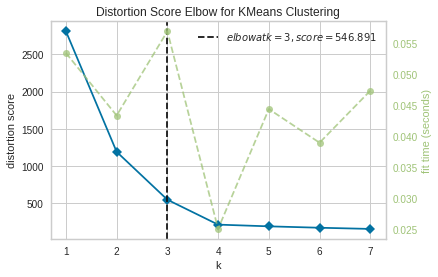

In [5]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer
from sklearn.datasets.samples_generator import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1, 8))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.poof()

In [7]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix()

plt.xlabel('true label')
plt.ylabel('predicted label');

TypeError: confusion_matrix() missing 2 required positional arguments: 'y_true' and 'y_pred'